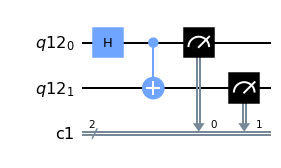

In [4]:
#Probability of 00 or 11

from qiskit import *
from qiskit.tools.visualization import plot_histogram as hist
sim=Aer.get_backend('qasm_simulator')
%matplotlib inline

qreg=QuantumRegister(2)             #Defining variables 
creg=ClassicalRegister(2)
circuit=QuantumCircuit(qreg,creg)

circuit.h(qreg[0])                  #Adding a hadamard gate on first qubit
circuit.cx(qreg[0],qreg[1])         #Adding a CNOT gate from first qubit to second qubit
circuit.measure(qreg,creg)          #Adding a measure gate

circuit.draw(output='mpl')          #Displaying the circuit


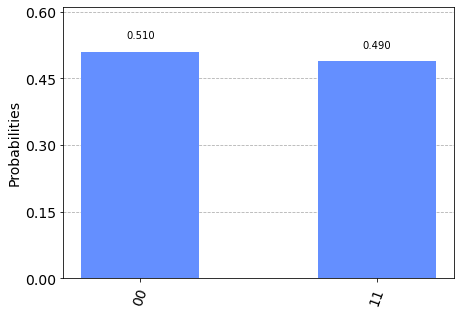

In [5]:
ex=execute(circuit,backend=sim)     #Executing circuit
result=ex.result()                  #Getting the result
hist(result.get_counts(circuit))    #Displaying result in a histogram

Job Status: job has successfully run


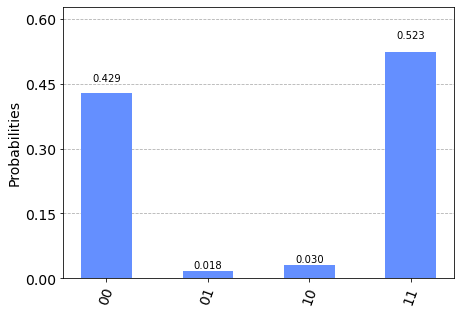

In [6]:
#Running program on an actual quantum computer
from qiskit.tools.monitor import job_monitor as jmonitor

#Enable IBM account using API token
IBMQ.enable_account('49537886c7dc829af6870fcc7f1c3c99ab97d9fb9f448802327f95e5abe9eebf7bcc1eb601b380dafab9998414f2bc2103d67155878ae771af88ab457e15f3d0')

#Get a provider
provider = IBMQ.get_provider(hub='ibm-q')

#Get a backend
back=provider.get_backend('ibmq_santiago')

#Execution
job=execute(circuit,backend=back) 
jmonitor(job)                       #send and execute code on backend
res=job.result()                    #Getting result
hist(res.get_counts(circuit))       #Displaying result in a histogram
